In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go


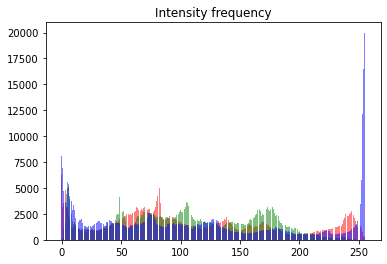

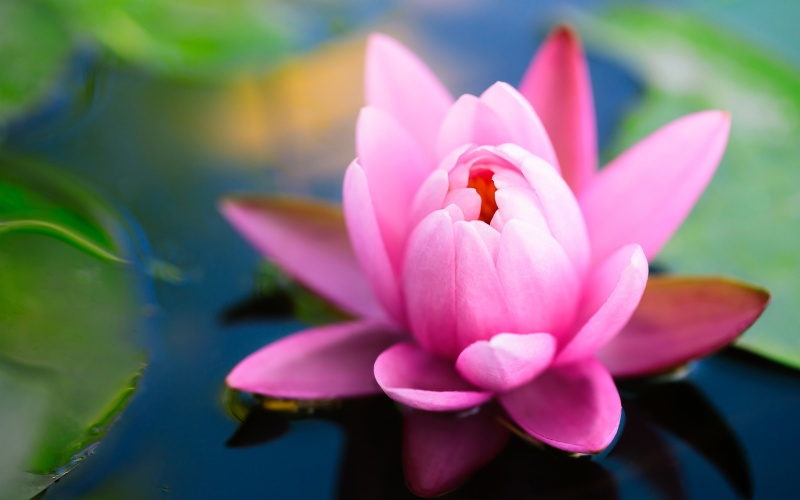

In [7]:
#Q1 Plot histogram for RGB images ‘lotus.jpg’. You can use inbuilt functions for that. 
#All RGB channels should be plotted in the same curve. 
#Create a function for this so that it can be used later also.

def plotrgbhistogram(I):
  l=[]
  for i in range(256):
    l.append(0)
  for i in I:
    for j in i:
      l[j[0]]+=1

  m=[]
  for i in range(256):
    m.append(0)
  for i in I:
    for j in i:
      m[j[1]]+=1

  n=[]
  for i in range(256):
    n.append(0)
  for i in I:
    for j in i:
      n[j[2]]+=1

  k=[]
  for i in range(256):
    k.append(i)
  plt.bar(k,l,color="red",alpha=0.5)
  plt.bar(k,m,color="green",alpha=0.5)
  plt.bar(k,n,color="blue",alpha=0.5)

  plt.title("Intensity frequency")
  plt.show()


I = cv2.imread('/content/drive/My Drive/Copy of lotus.jpg')
plotrgbhistogram(I)

cv2_imshow(I)

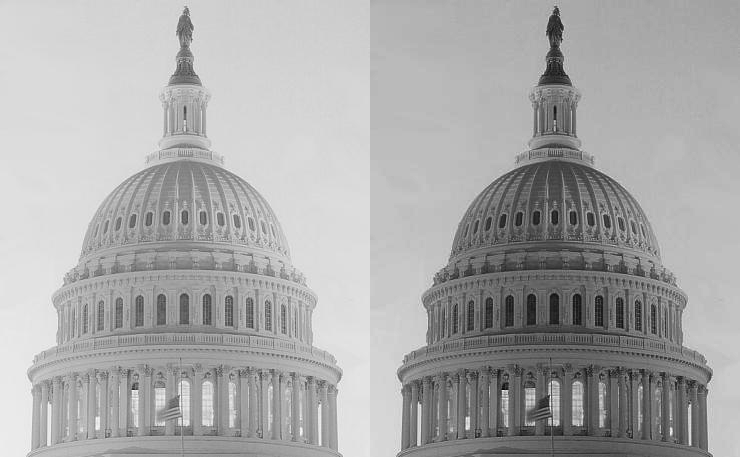

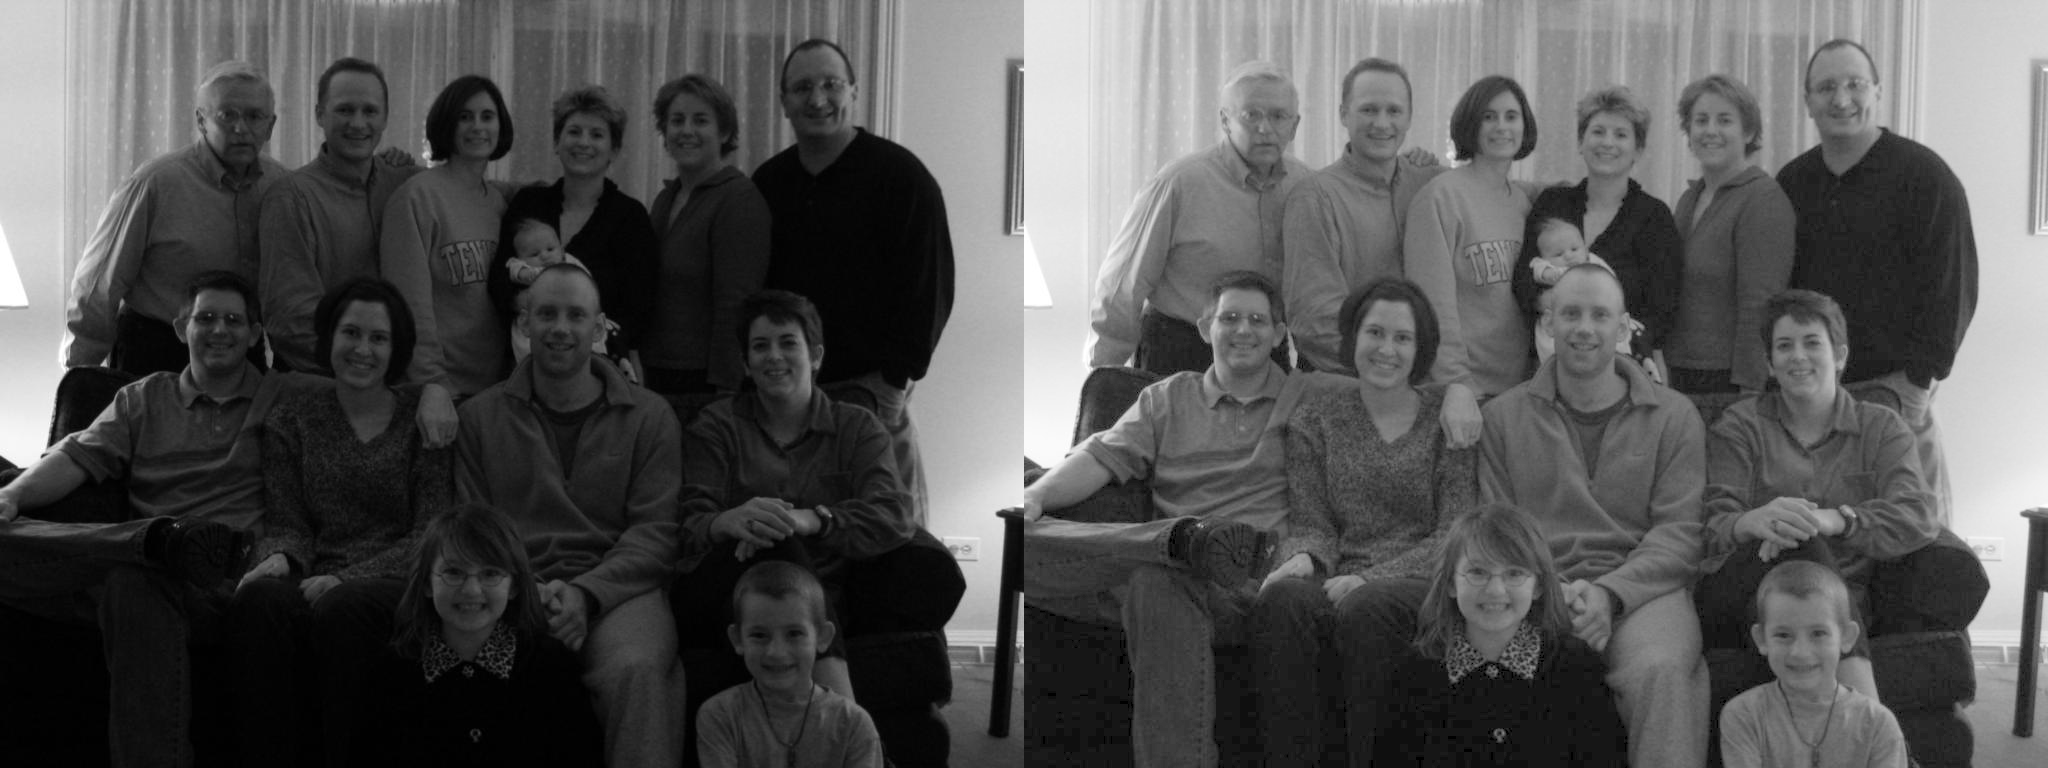

In [5]:
#Q2 Perform gamma transformation on the images gamma1.jpg and gamma2.jpg and see which values of gamma give you better images.
#Use C = 1.

I1 = cv2.imread('/content/drive/My Drive/Copy of gamma1.jpg', cv2.IMREAD_GRAYSCALE)
I1 = I1.astype('int')
I1_shifted=I1/255
I1_shifted=I1_shifted**2
I1_shifted=I1_shifted*255
I1_shifted = np.clip((I1_shifted),0,255).astype('uint8')
cv2_imshow(np.hstack([I1,I1_shifted]))


I2 = cv2.imread('/content/drive/My Drive/Copy of gamma2.jpg', cv2.IMREAD_GRAYSCALE)
I2 = I2.astype('int')
I2_shifted=I2/255
I2_shifted=I2_shifted**0.5
I2_shifted=I2_shifted*255
I2_shifted = np.clip((I2_shifted),0,255).astype('uint8')
cv2_imshow(np.hstack([I2,I2_shifted]))

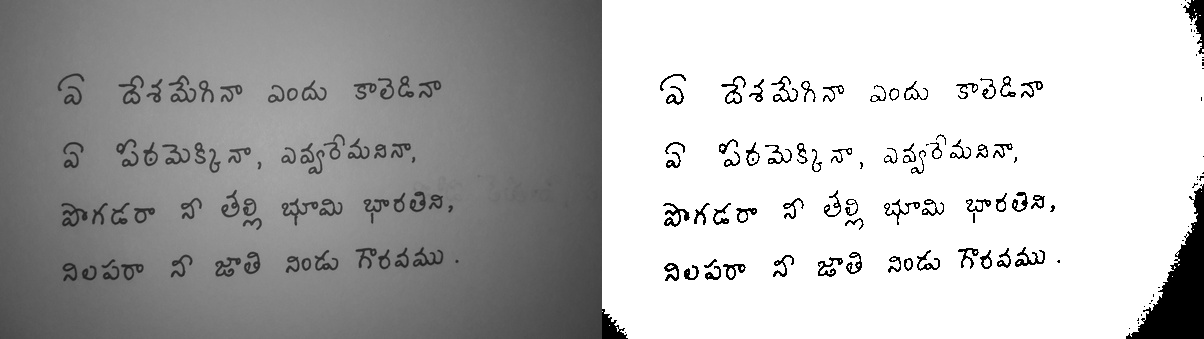

In [13]:
#Q3 Perform thresholding on the image ‘text.jpg’

I = cv2.imread('/content/drive/My Drive/Copy of text.jpg', cv2.IMREAD_GRAYSCALE)
ret,thresh1 = cv2.threshold(I,80,255,cv2.THRESH_BINARY)
cv2_imshow(np.hstack([I, thresh1]))

number of horizontal edges= 13
number of vertical edges= 9
Number of windows= 140 



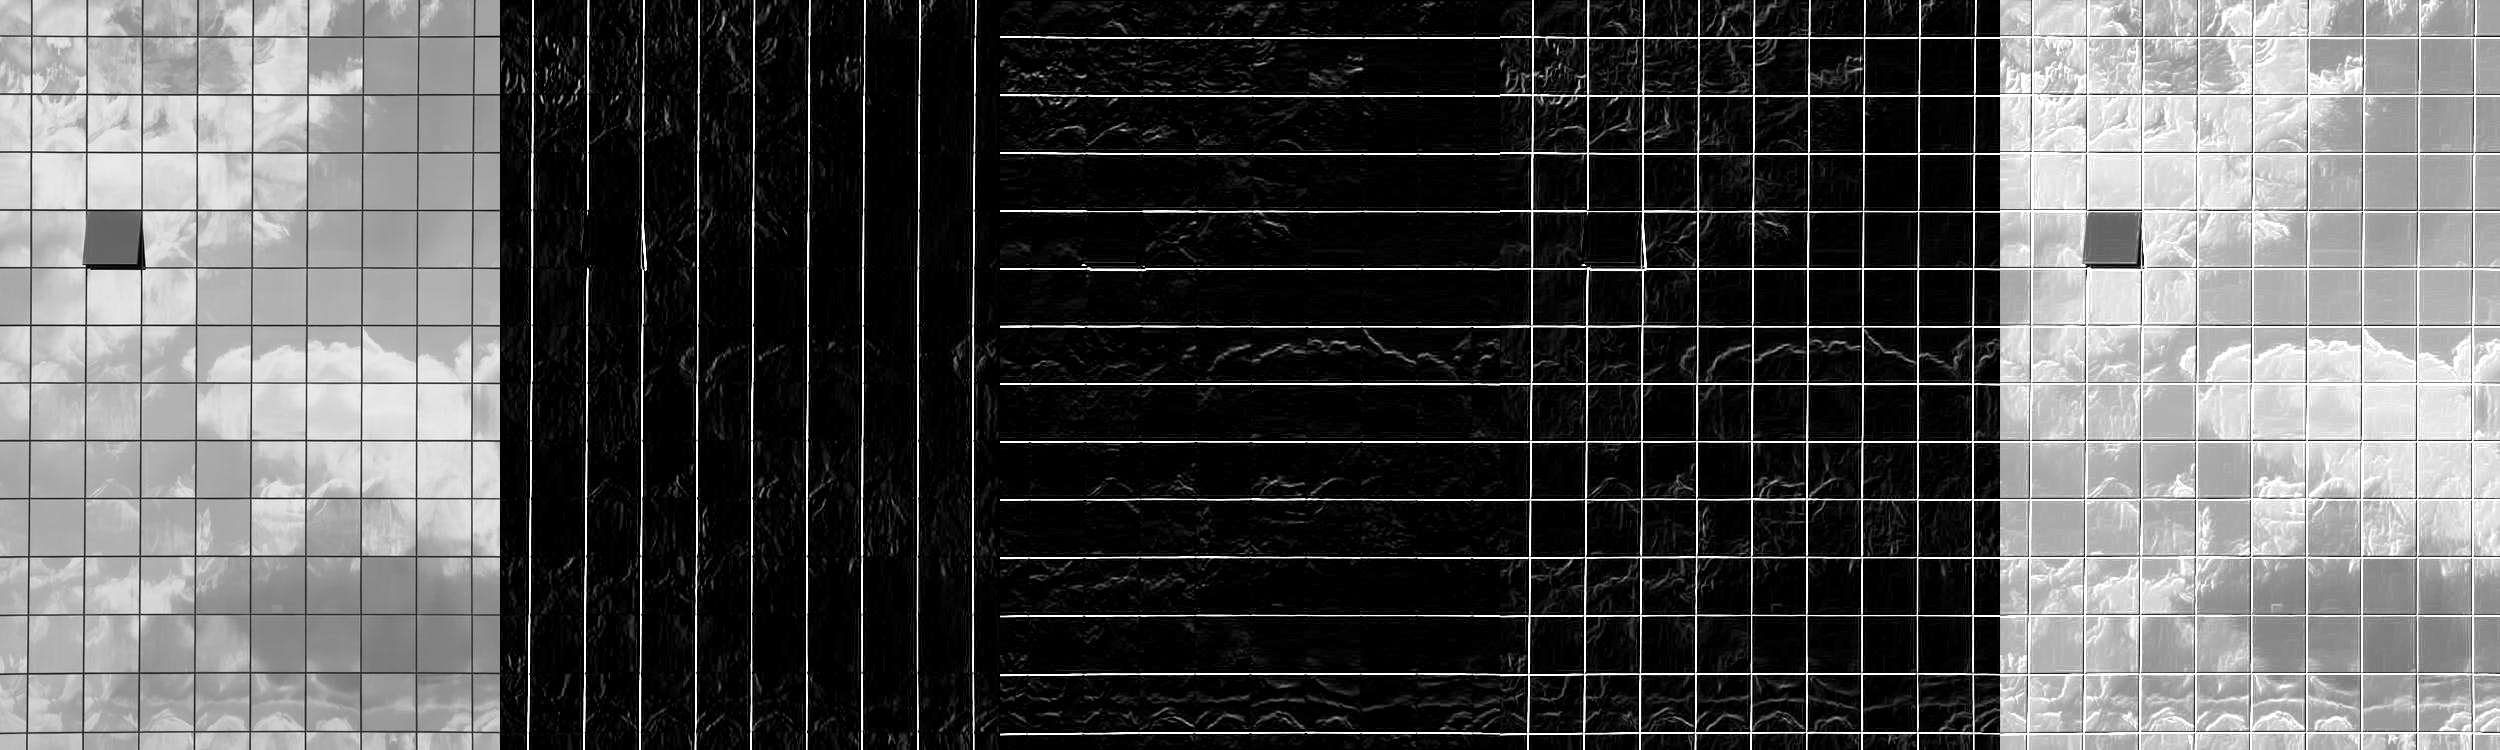

In [16]:
#Q4 Count the number of windows in image 'window.jpeg' using edge detection filters.

I = cv2.imread('/content/drive/My Drive/Copy of window.jpeg', cv2.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filtered_image1 = cv2.filter2D(I,-1,sobel_x)

sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
filtered_image2 = cv2.filter2D(I,-1,sobel_y)
p=1
count1=0
for i in range(0,filtered_image2.shape[0],3):
  if(filtered_image2[i][40]>50):

    count1+=1

p=1
count2=0
f=0
for i in range(0,filtered_image2.shape[0]):
  if(filtered_image2[i][40]>200):
    if(f==0):
      count2+=1
      f=1
  else:
    if(f==1):
      f=0
print("number of horizontal edges=",count2)
p*=(count2+1)
count2=0
f=0
for j in range(0,filtered_image1.shape[1]):
  if(filtered_image1[400][j]>200):
    if(f==0):
      count2+=1
      f=1
  else:
    if(f==1):
      f=0
print("number of vertical edges=",(count2))
p*=(count2+1)
print("Number of windows=",p,"\n")


magnitude = np.sqrt(np.square(filtered_image1.astype('int')) + np.square(filtered_image2.astype('int')))
final = np.clip((I + magnitude),0,255).astype('uint8')
cv2_imshow(np.hstack([I,filtered_image1,filtered_image2, magnitude, final]))

